# **Part A: Significance Testing**

## Introduction

The dataset I have chosen for this coursework falls under the name "high_diamond_ranked_10min" and is derived data from the video game 'Lague of Legends'.

League of Legends is one of the world's most popular video games, developed by Riot Games. It features a team-based competitive game mode based on strategy and outplaying opponents. Players work with their team to break the enemy Nexus before the enemy team breaks theirs.

The game is oriented around two sides; Blue side or Purple side. The dataset focuses stats from the first 10 minutes of a game from teams playing on the blue side (all roughly the same level or game rank). A vast amount of numerical data is collected ranging from the number of kills, to the total gold of the team. The dataset coinsists of nominal and categorical data of almost 10,000 unique ranked games; which would total around 100,000 user accounts contributing to the statistics.

The 'BlueWins' column is the target; with 1 representing a win, and a 0 representing a loss for the blue team. The genral purpose of this dataset is to collect data that helps gain a better understanding of the sigificant factors that lead to a team winning (or losing) the game; focusing primarily on the desisions within the first 10 minutes of the game, as these tpyically have the biggest impact on the overall game, and to find any correlations that may exist between any two or more columns in the dataset.

The Dataset was found on the website Kaggle; a free online community made up of data scientists and machine learning engineers (and me...) that provide around 50,000 free datasets to users looking to improve their skills.

For task A of the course work. I'm going to be looking at the dataset focusing on the two columns 'blueKills' and 'blueAssists' to see if there is a relation between the number of kills in a game, and the number of assists with the hypothesis being: **More kills in a given game, will increase the number of assists in the same game**

**Data Set Link:**

https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min

## Data Cleansing and Understanding the Dataset





First I will import the relevant libraries and read in the dataset to the colab file and print some general information about it so it is more understandable to the reader.

In [ ]:
# Importing relevant libraries


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import pearsonr
import seaborn as sns
import plotly
import numpy as np
import pandas as pd
import pylab
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model as linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Read dataset from csv file
df =  pd.read_csv("high_diamond_ranked_10min.csv")

#setting the layout options for the output of the dataframe so that the data is more readable.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)

#prints general info on the data in the dataframe
print(df.info())

print("")
print("")
print("")

#prints the first 5 rows of data
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

First thing to do before performing any sort of analysis is to te cleanse the data of any values that could potentially harm or negatively effect our results.

to do this, I'll look for any of the following:


1.   Null Values
2.   missing values such as '?'
3.   duplicate values

Once I have conformation that these are cleansed from the data set I can continue my investigation.


In [ ]:
# Check for null values
null_values = df.isnull()

# checking null values
if null_values.any().any():
    # If there are null values
    print("Null values are present in the DataFrame:")
    print(null_values)
else:
    # If there are no null values
    print("No null values are present in the DataFrame.")

#Check for '?' values
question_mark_values = df.eq('?')

if question_mark_values.any().any():
    print("'?' values are present in the DataFrame:")
    print(question_mark_values)
else:
    print("No '?' values are present in the DataFrame.")

# Check for duplicate values
duplicate_values = df[df.duplicated()]

# checking deuplicates
if not duplicate_values.empty:
    # If there are duplicate values
    print("Duplicate values are present in the DataFrame:")
    print(duplicate_values)
else:
    # If there are no duplicate values
    print("No duplicate values are present in the DataFrame.")



No null values are present in the DataFrame.
No '?' values are present in the DataFrame.
No duplicate values are present in the DataFrame.


## Parametric Vs. Non-Parametric  

to figure out whether I need to use Parametric/non-parametric significance test's I will need to clarify the type of data in the dataset. If I am to use parametric significance testing, my data must meet the following criteria:



1.   Normality – Data in each group should be normally distributed.
2.   Equal Variance – Data in each group should have approximately equal variance.
3.   Independence – Data in each group should be randomly and independently sampled from the population.
4.   No Outliers – There should be no extreme outliers.

To help further examine if my data meets the criteria of parametric testing, I am going to visualize the columns into distribution barcharts. In addition to this, I will also use a Q-Q plot to check that the data is normally distributed. The reason for a Q-Q plot and not something like a Shapiro-Wilk test is because the sample size is very high, much too high for a Shapiro-Wilk test.









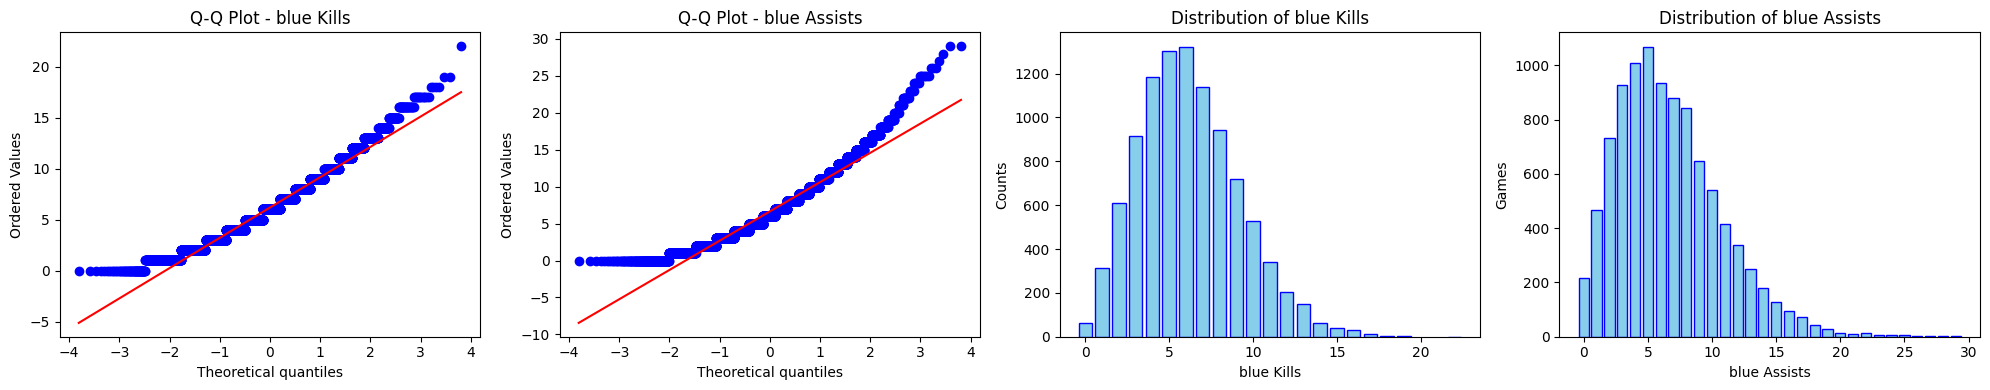

In [ ]:

#assigning columns to values
data1 = df['blueKills']
data2 = df['blueAssists']

# Create subplots for Q-Q plots and bar charts - so that visuals are side by side
fig, axs = plt.subplots(1, 4, figsize=(20, 4))

# Q-Q plot for 'blueKills'
stats.probplot(data1, dist="norm", plot=axs[0])
axs[0].set_title('Q-Q Plot - blue Kills')

# Q-Q plot for 'blueAssists'
stats.probplot(data2, dist="norm", plot=axs[1])
axs[1].set_title('Q-Q Plot - blue Assists')

# Bar chart for 'blueKills'
course_count_kills = df['blueKills'].value_counts()
categories_kills = course_count_kills.index
counts_kills = course_count_kills.values
axs[2].bar(categories_kills, counts_kills, color='skyblue', edgecolor='blue')
axs[2].set_xlabel('blue Kills')
axs[2].set_ylabel('Counts')
axs[2].set_title('Distribution of blue Kills')

# Bar chart for 'blueAssists'
course_count_assists = df['blueAssists'].value_counts()
categories_assists = course_count_assists.index
counts_assists = course_count_assists.values
axs[3].bar(categories_assists, counts_assists, color='skyblue', edgecolor='blue')
axs[3].set_xlabel('blue Assists')
axs[3].set_ylabel('Games')
axs[3].set_title('Distribution of blue Assists')

#displaying the graphs
plt.tight_layout()
plt.show()

**Results**

Based on the visualizations in these 4 graphs, we can see that the distribution is not normal. The barchart distibution shows that the data has a positive sknewness to it. The Q-Q test also reinforce that the distribution is not normal; rather than following a normal ditribution line, the data plots seem to curve upwards, almost exponentially. This tells me that I will need to perform a non-parametric significance test.

Further to this, the following two points also cause a slight issue with reinforcing parametric testing:

1.   The data does NOT have equal variance; for the most part it does, however the kills column is capped at 22, where as the assists column has a significant amount of data above this value.

2.   The data is NOT look to be free of outliers; the kills column's max values does not seem to sit close with the rest of the distribution of kills.

For the reasons above, I will be using **non-parametric** significance tests.

## Significance Testing - Spearman's Rank

The test I have decided to carry out is the spearmans rank test. This test focuses on the monitonic corelation between two sets of data. Both the kills and assists columns in the data set are considered monotonic, as they only increase in value and never decrease. So the spearmansrank tests seems appropriate.

Spearman's rank correlation: 0.8191572888422387
P-value: 0.0
The correlation is statistically significant at the 5% level.


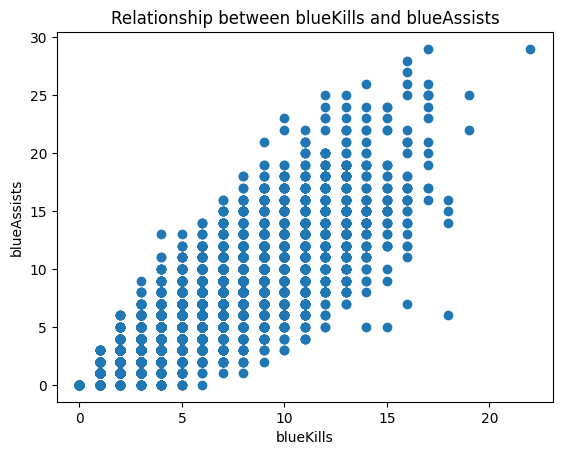

In [ ]:
#Spearman's rank correlation
corr, p_value = spearmanr(df['blueKills'], df['blueAssists'])

print("Spearman's rank correlation:", corr)
print("P-value:", p_value)

if p_value < 0.05:
    print("The correlation is statistically significant at the 5% level.")
else:
    print("There is no statistically significant correlation.")

#creatong my scatter plot
plt.scatter(df['blueKills'], df['blueAssists'])
plt.xlabel('blueKills')
plt.ylabel('blueAssists')
plt.title('Relationship between blueKills and blueAssists')
plt.show()

**Results**

**Spearman's rank correlation: 0.8191572888422387**

the spearmans rank results when done correctly range between 1 to -1 and these values respresent the following (we are looking for a positive correaltion so I will only list the positive ranges):



*   0 - No correlation
*   0.01 to 0.20 - Neglibible positive correlation
*   0.21 to 0.40 - weak positive monotic correlation
*   0.41 to 0.80 - moderate positive monotonic correaltion
*   0.81 to 0.99 - strong positive monotonic correaltion
*   1            - perfect monotonic correaltion

Our results inidicate that there is a strong positive monotonic correlation between these two collumns, and it proves that when the value of one collumns increases, there is a strong likely hood that the other collumn will increase also.

**P-value: 0.0**

P-value indicates the probability that an observeable difference or relationship is due to chance. The closer the number to is to 1, the greater the likeloyhood that the observation was created randomly or by chance.

the results of our P-value is 0.0. Results under 0.05 are considered to be significant. So in this case, our results would be considered singificant to proving our hypothesis and rejecting the null hypothesis.

A result of 0.0 means that there is strong evidence to support the presence of a significant positive monotonic relationship between the blueKills and blueAssists columns, and that the relationship betwen these collumns did not happen by chance. This would make sense, as usually Lague of legends is a team game that requires players to work together, meaining kills are often an outcome of collaboration across multiple players.

**Scatter Plot**

The P-value and spearmans rank results can be further reinforced through the visualization of a scatter plot - merging the two columns together clearly indicates a positive monotonic realtionship. The data clearly indicates that when one value increases, there is a strong likelyhood of the other increasing; this is shwon in the positive trend in the graph. Providing more evidence that I can reject the null hypothisis that more kills in a game does not lead to more assists.






    

# **Part B: Linear Regression Analysis**

Linear Regression Analysis focuses primarily on modelling the relationships between a dependent variable (known as the respsonse variable) and one or many independent variables (known as the predictor variables). The analysis works on the assumption that there is already a linear relationship between the variables in question which means a change in the dependent variables is always mirrored by a change in the dependent variable. If there is no linear relationship between the dependent and inpdependent variables, then linear regression analysis techniques cannot be used as a reliable method of analysis.

The main goal of linear regresison is to estimate the the coefficients that lies in the regression equation. This will produce the best fitting straight line that best describes the relationship between the variables. This line and equation can then be used in the future to further estimate/predict the the outcome of variables and their relationships.

in regards to the wine.csv dataset, linear regresion analysis allows for better understanding of the fundamental relationships between the data, and could help define what data is most significant in the classification of the wine and what other variables in the dataset also share a close linear relationship with each other. This understanding would provide a base line equation for the data, which could then be used to predict the classification of other wines based off the information on the dataset.  

### **Loading Dataset and Data Cleansing**

In [ ]:
# Read dataset from csv file
df =  pd.read_csv("wine.csv")
#print info on the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malicacid                     178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  0D280_0D315_of_diluted_wines  178 non-null    float64
 13  proli

**Checking for rogue values**

In [ ]:
# checking for null values
null_values = df.isnull()

# Check if any null values are present
if null_values.any().any():
    print("Null values are present in the DataFrame:")
    print(null_values)
else:
    print("No null values are present in the DataFrame.")

# Check for '?' values
question_mark_values = df.eq('?')

if question_mark_values.any().any():
    print("'?' values are present in the DataFrame:")
    print(question_mark_values)
else:
    print("No '?' values are present in the DataFrame.")

# Check for duplicatess
duplicate_values = df[df.duplicated()]

# if duplicates are presennt in df
if not duplicate_values.empty:
    print("Duplicate values are present in the DataFrame:")
    print(duplicate_values)
else:
    print("No duplicate values are present in the DataFrame.")



No null values are present in the DataFrame.
No '?' values are present in the DataFrame.
No duplicate values are present in the DataFrame.


### **R Values and correlations**

Before I can start any type of regression analysis it is important to define what kind of relationships the columns of data to one and other. This step could be skipped technically and I could go straight into my anaysis, but I would risk the potential of wasting a lot of time, as some of the pairs of columns are likely to have no relationship at all to one and another and that would render my linear analysis redundant.



#### **Heat Map**

One way I can look at the relationship between columns is through a heatmap. This is a great visual tool and is likely the fastest approach to discovering quick relationships between exisiting datasets. The diagram displays all columns in a a cross-referencing pattern and each intersection of two columns is represented by a colour; the colour indicates the relationship between the columns. There is a diagonal line through the visual that is all one colour; this is when the column intersects itself, meaning that there is a 100% correlation; we are looking for something as close to this as possible for our analysis. Alternitively we could look for something at the bottom end of the scale as well; this would indicate a strong negative corelation between the columns. Intersections with a colour in the middle of the spectrum are columns pairs with little to no linear relationship and can be disgarded in this investigation.  

We can see from the diagram below that there is a good positive corelation between the following columns:

*   total_phenols & flavanoids
*   flavanoids & 0D280_0D315_of_diluted_Wines

We can see from the diagram below that there is a good negative corelation between the following columns:


*   0D280_0D315_of_diluted_Wines & class
*   flavanoids & class






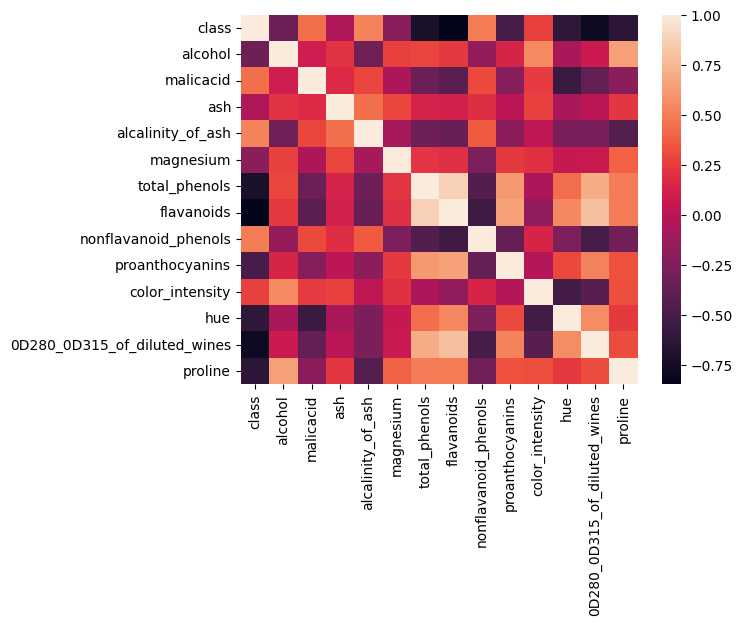

In [ ]:
#creating heatmap
sns.heatmap(df.corr())
plt.show()#display the diagram

#### **R Values**

Another way of finding relationships between the columns of data is to look at the R_values. This is a definitive value that relates to the linear trend between 2 columns of data. The number can range from 1 to -1:

*   1 is absolute positive corelation
*   0 is no corelaiton at all
*   -1 is an absolute negative corelation

I will test the R Values by looping through the Dataframe, matching every unique pair of columns, and scoring them individually. There are a very high number of unique pairs of columns so for the sake of keeping things tidy I have only listed ones with a positive/negative corelation of .5 or higher.

The results show much of the same as the heat map but in a more more detailed way. They confirm that the highest pairing positive relationship is between total_phenols and flavanoids and the highest negative linear relationship is between class and flavanoids.  


In [ ]:
# Get all possible pairs of columns to compare - only unique columns are compared together so that there are no 1 to 1 comparisons
column_pairs = [(col1, col2) for col1 in df.columns for col2 in df.columns if col1 != col2]

#calculate the correlation coefficient for each pair and store in a list
correlation_values = []

for col1, col2 in column_pairs:
    correlation_value = df[col1].corr(df[col2])

    #only display values between -1 and -0.5 or 0.5 and 1
    if abs(correlation_value) >= 0.5 and abs(correlation_value) <= 1:
        correlation_values.append((col1, col2, correlation_value))

#sort the list in descending order based on correlation coefficient
sorted_correlation_values = sorted(correlation_values, key=lambda x: abs(x[2]), reverse=True)

#displaying list of values
print("Column pairs with correlation coefficients between -0.5 and -1, or 0.5 and 1 (highest to lowest):")
for col1, col2, corr_value in sorted_correlation_values:
    print(f"{col1} and {col2}: {corr_value}")

Column pairs with correlation coefficients between -0.5 and -1, or 0.5 and 1 (highest to lowest):
total_phenols and flavanoids: 0.8645635000951151
flavanoids and total_phenols: 0.8645635000951151
flavanoids and class: -0.8474975401417579
class and flavanoids: -0.8474975401417578
class and 0D280_0D315_of_diluted_wines: -0.7882295886876622
0D280_0D315_of_diluted_wines and class: -0.7882295886876622
flavanoids and 0D280_0D315_of_diluted_wines: 0.7871939018669505
0D280_0D315_of_diluted_wines and flavanoids: 0.7871939018669505
class and total_phenols: -0.7191633405539714
total_phenols and class: -0.7191633405539714
total_phenols and 0D280_0D315_of_diluted_wines: 0.6999493647911861
0D280_0D315_of_diluted_wines and total_phenols: 0.6999493647911861
flavanoids and proanthocyanins: 0.6526917686075147
proanthocyanins and flavanoids: 0.6526917686075147
alcohol and proline: 0.6437200371782135
proline and alcohol: 0.6437200371782135
class and proline: -0.6337167849870337
proline and class: -0.63371

### **Simple Linear Regression Analysis**

**A simple linear regression analaysis only consists of 1 independent variable against a single dependent variable.**

**We will be analysing the relationship between one of the highest R-value column pairs in an attempt to train a regresison model to predict the total_phenols against the flavanoids.**

####**Splitting the data into training and testing sets**





Here We are loading the collumns we want to test into seperate variables 'X' and 'Y'. the X column represents the independent vriables and the Y columns represents the dependent variable that we are testing.

The columns are converted into 1 dimensional arrays using the .values function, this is then followed by converting them into 2 dimensional arrays. This is done so that the data is in a format that is understood by the test_train_split function.

The data is then split into two categories; training and testing. This is so that the regression model has real situational data that it can use to train the algorithm with. In this instance I've used a 80-20 split. so 80% of the data form the columns will be used to train the regression model, and the remaining 20% will be used as test data to test the accuracy of the linear prediction.

A random state value of 0 - this essentially gives us a call back to the test&train split. if we wanted to replicate this test with the same data set, we could reference the same random state, and ensure that the same data is being split between the model and the test.

In [ ]:
#Defining the predictor variables (x) and the target  (y) - .reshape isnt recognised unless we use the .values function.
X = df['flavanoids'].values
Y = df['total_phenols'].values

#changing X & Y from 1D array to 2D array
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

#Splitting the wine data into training and testing sets (80% train, 20% test) - adding a random state value incase we want to reproduce the test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

####**Test train split visualisation**

In this part of the investigation we are creating two visualisations based off of the test data and prediction data.

The first visualisation is a scatter plot that encompasses the entire data of the two columns to show the distributions and linear relationship between the two columns. The entities are split into colours:


1.   Red for the training data
2.   Green for the test data

The second graph shows a our final prediction model regression line. This was created using the training data and then tested using a scatter plot with the actual test data from the dataset. We can see at first glance that the model has clearly established a good prediction as to where the data will sit on average, with a fairly even amount of scatter points above and below the prediciton line. We will look at the accuracy of this prediciton in further detail below.

We can also feed the model data manually and test that the predictions match the regression line (done below).



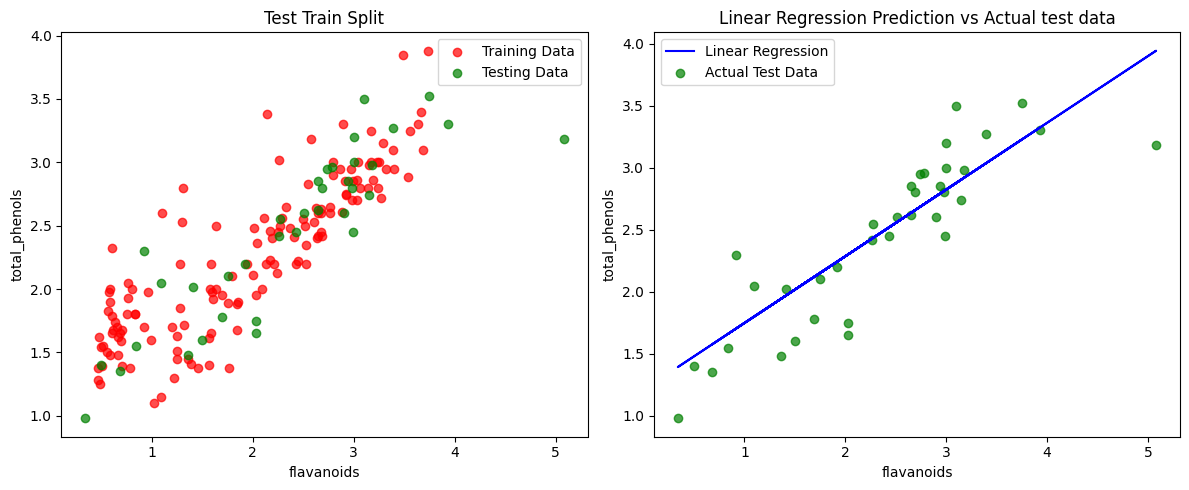

MANUAL PREDICTIONS:
Manual Prediction for 3:  [2.82381718]
Manual Prediction for 0.5:  [1.47929165]


In [ ]:
#Create subplots for graphs
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

#scatter plot of the training and testing data
axs[0].scatter(X_train, Y_train, label='Training Data', color='r', alpha=0.7)
axs[0].scatter(X_test, Y_test, label='Testing Data', color='g', alpha=0.7)
axs[0].legend()
axs[0].set_title("Test Train Split")
axs[0].set_xlabel("flavanoids")
axs[0].set_ylabel("total_phenols")

#Create Linear model and train it with the training data
LR = LinearRegression()
LR.fit(X_train, Y_train)

#make a prediction with the test data
prediction = LR.predict(X_test)

#mapping a regression line along the data
axs[1].plot(X_test, prediction, label='Linear Regression', color='b')
axs[1].scatter(X_test, Y_test, label='Actual Test Data', color='g', alpha=0.7)
axs[1].legend()
axs[1].set_title("Linear Regression Prediction vs Actual test data")
axs[1].set_xlabel("flavanoids")
axs[1].set_ylabel("total_phenols")

#Display Visuals
plt.tight_layout()
plt.show()

print("MANUAL PREDICTIONS:")
print("Manual Prediction for 3: ", LR.predict(np.array([[3]]))[0])
print("Manual Prediction for 0.5: ", LR.predict(np.array([[0.5]]))[0])

#### **Calculate the R_Value and LR Score**

In [ ]:
# Calculate the Pearson correlation coefficient (r) between predicted and actual values
#flatten() is used to return the arrays back to 1D (got errors without this)
#[0,1] merges the two results together for better results visualisation
r_value = np.corrcoef(Y_test.flatten(), prediction.flatten())[0, 1]

# Print the R-value
print(f'R-value (Pearson correlation coefficient): {r_value}')
print("Linear Regression Score: ", LR.score(X_test, Y_test))

R-value (Pearson correlation coefficient): 0.8797629637393658
Linear Regression Score:  0.7695990333112133


#### **Results/Findings**

The results of the simple linear regression analysis show that there is definetely a strong indication of a positive relationship between the flavanoids and total_phenols columns.

The Pearson correlation coefficient (R-value) measures the strength and direction of a linear relationship between two variables. in the context of this analysis, a result of 0.87 would suggest a storng positive correlation betwen the two columns, proving that an increase in the predictor variables is associated with an increase in the target variable.

The Linear regresison score of 0.769 is also a good indicator that the model is working correctly. it essentially means that 77% of the variance in the tagert vairable (total_phenols) can be explained by the linear relationship with the independent variable (falavnoids).

The scatter plot we have generated also indicates that the regression line is situated accurately, the line intersects a significant amount of plots, and there are a relatively equal number on either side of the line. Using the manual prediction function on the model with some random numbers, then tested against the regression line also indicates a fairly strong accuracy in the model; we input two numbers (3 & 0.5). If we were to draw a straight line upwards from the point on the x-axis where the value that we are testing lies (3 & 0.5), we can see that the striaght line intersects the regression line roughly where the clusters of data lie. This tells us that the regression line is more acurate than not acurate.

A score of 77% is far from perfect, however. We can see from the scatter plot that there is a few outlier data points on the graph, which may have thrown the prediction model off slightly. Also, it is worth noting that the R value between the two columns was high nonetheless, but not perfect; this tells us that the regresion model would struggle trying to perfectly predict every result, so a score is 77% is still pretty good.  

###**Complex Linear Regression Analysis**

**A complex linear regression analysis involves more than one independent variable against a single dependent variable**

Here I will test all the collumn variables that already have a good linear relation to the target column 'class'. These columns are:



*   flavanoids
*   total_phenols
*   0D280_0D315_of_diluted_wines

The above columns will be the independent variables that we will test against the dependent variable 'class'

We will use the same test and train ratio as before (an 80/20 split). Once the model has been trained, we will use the model to make a prediction with the leftover test data. The goal is to get the Y prediction data (class) as close to the test data as possible.

We can see that from the print output, the prediction data looks promising.



####**Test and Train**

In [ ]:
#Setting the value for X and Y
X = df[['flavanoids', 'total_phenols', '0D280_0D315_of_diluted_wines']]
y = df['class']

#Splitting the wine data into training and testing sets (80% train, 20% test) - adding a random state value incase we want to reproduce the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg_model = LinearRegression()

#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

#Predicting the Test and Train set result
y_pred= reg_model.predict(X_test)

print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 1.24313225  2.53430098  1.41278031  1.45378019  1.44213611 -0.20776803
  1.38248938  2.97111371  1.61200139  2.22410362  2.7742151   3.13508653
  1.17769695  1.02160849  2.78975389  1.64736969  1.48697938  0.83943743
  2.58459594  1.09875967  1.14997655  1.72937922  1.50791864  1.6836778
  2.77659149  1.7737961   1.22052322  2.14251905  1.83939951  2.88704372
  1.26625623  1.27701756  2.07924165  1.42273336  1.34225317  1.22038278]


Next thing to do is to compare the prediciton data with the actual data. As we can see the actual data is a whole number, so the test data obviosuly lacks accuracy in that perspective. But on the whole it seeems to have done a pretty good job of intereperting the training data and using that to make an accurate assumption for the test data. There are definetely a few outliers (like index 121) but other than that it seems to have done a relatively good job.

####**Prediction vs Actual Data**

In [ ]:
#creating a dataframe to display the actual data next to the test data
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
54,1,1.243132
151,3,2.534301
63,2,1.412780
55,1,1.453780
123,2,1.442136
121,2,-0.207768
7,1,1.382489
160,3,2.971114
106,2,1.612001
90,2,2.224104


####**SKLearn Metric Results**

In [ ]:
#calculating and printing results
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 0.4210986419384507
Mean Square Error: 0.3231312944573045
Root Mean Square Error: 0.5684463866164552


####**Results/Findings**

The results of the complex linear regression show that there is indeed a correlation between the target and independent variables that are used to train the model with. This can be verified by the results form the Mean Absolute Error, Mean Square Error, and the Root Mean Square Error:

*   Mean Absolute Error: 0.4210986419384507
*   Mean Square Error: 0.3231312944573045
*   Root Mean Square Error: 0.5684463866164552

**Mean Absolute Error:**

This is a measure of the average absolute differences between predicted and actual values. It is calculated as the average of the absolute differences between the predicted and actual values. The closer the result is to zero, the more accurate the model is. generally a score of 0.42 would be a very good score, though in relation to this dataset where the target ranges from 1-3, this score is still a significant range away from being accurate. However if the scores were roudned, which we can assume is likely considering how many data variables go into classifying the wine, then it is safe to say that the model has the potential to be far more accurate than what can see right now.

**Mean Square Error**

This is another measure of the average absolute differences between predicted and actual values, this time the answers are squared. This function penalizes larger differences compared to smaller ones due to the mechanics of the squaring operation. Our results were 0.32, much lower than our initial MAE results. this indicates that there may be a few skewed outlier data points in the test/prediction results and that the model is perhaps more accurate over a large scale of numbers but there is potential for inconsistencies that negate the proper results. We can see this from the results of the test data; were the actual class data on index 121 is '2' but the model predicted '-0.2'. This could have potentially skewed the overall MAE results.

**Root Mean Square Error**

This is the square root of the Mean Squared Error. It provides a measure of the average magnitude of the errors in the predicted values. It too is heavily weighed down to larger erorrs due to the square operation. The fact that our RMSE results are higher than our MAE results would suggest that there are some larger errors (like index 121) in the test data that are negatively impacting the results of our test metrics.

In clonclusion, these result have shown that the independent test columns (flavanoids, total_phenols and 0D280_0D315_of_diluted_wines) are significantly relevant the target column and play an imprtant role in predicting the outcome of the target data. The three columns alone may not be enough to accurately predict the target data every time, however with the use of rounding to the nearest whole number the model could be potentially made more acurate without the need for more training. The model could also potentially benifit from other linear related columns in order to provide more insight and accuracy to the overall prdiction.  



#**Part B: Logistic Regression**

Logistic regression is a statistical method used for binary and multinomial classification. Contrary to the name, its more commonly used for classification problems rather than regression problems. It works by modelling the probability that any given instance is connected to a specific category. It's typically used when the dpenedent variable consists of categorical data that can be represented by a binary system (1 or 0). However, the model can aslo be trained to suit categorical dependent data that fits outwith this classification (more than 2 categories); this is known as a multinominal regression analysis. The Target class of the wine.cvs consists of three categorical values (1-3), therefore the following alanysis will consists of two multinominal regression models.

A logistic regression analysis is a great method of analysis for this particular data set, as the dataset consists of all nominal data which is easily fit into the model, the target is also composed of categorical data which again, fits this regression model perfectly. This makes the model very easy and quick to implement, and helps us fruther understand what columns play an important role at predicting the target. This model is proven to be also very efficient with lower volume datasets, which again, suits this investigation as there is less than 200 entries.

###**Logistic Regression 1**

The 'X' data will consist of every column in the data set minus the 'class' column. The 'Y' data will consists of the dependent variable 'class'. The goal of this regression model is to try and accurately predict the class value using information from the whole dataset.

#### **Test, Train and Predict**

Creating an 80/20 split between the training and test data and applying a random state so that the test can be replicated if need be.

After that the model is trained using the 'X_test' data. Then a prediction for the Y test data is made using the now trained model.

Scores are generated straight after which are displayed further below.

In [ ]:
#independent values - all columns except the target
X = df.drop('class', axis=1)
#dependent column - class (target) column
y = df['class']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create the model
#multinomial as the class target contains more than 2 categorical values (1,2,3) - not binary
model = LogisticRegression(multi_class='multinomial', max_iter=1000)

#fit the model on the training data
model.fit(X_train, y_train)

#predicting the Y values with the X test data
y_pred = model.predict(X_test)

#evaluating the performance of the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

#### **Scores**

The following test scores are generated and mean the following:

**Accuracy**: The accuracy is a measure of how many predictions the model gets correct.

**Precision**: Precision is the ratio of true positives to the sum of true positives and false positives.

**Recall**: Recall is the ratio of true positives to the sum of true positives and false negatives.

**f1score**-:The F1-score is the mean of precision and recall.

**support**: Support is the number of actual occurrences of the class in the specified dataset

**macro avg**: The unweighted average of precision, recall, and F1-score across classes

**weighted avg**: The weighted average of precision, recall, and F1-score, where each class's score is weighted by the support


In [ ]:
#printing the scores
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report_result)

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



#### **Displaying Test Data**

Here we have created a new dataframe to better visualise the comparison betwene the actual values in the data set and the Y_pred prediciton values. We can see that overall just from a quick look the model seems fairly accurate. This is a quick but less accurate way of checking to see the overall accuracy of the data. I will analyse the results properly further into this investigation.

In [ ]:
#creating a dataframe to display the actual data next to the test data
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
19,1,1
45,1,1
140,3,3
30,1,1
67,2,2
16,1,1
119,2,2
174,3,3
109,2,2
141,3,3


### **Logistic Regression 2**

This model will be trained with the columns 'total_phenols' and 'flavanoids' as the idependent columns. These two columns both had a strong correlation to the class (target) column. So the aim of this analysis is to take advantage of that high correlation from each individual column, and merge them together to hopefully predict the clas column accurately. This analysis only consists of 2 independent columns, which means I hypothesise that the chances of predicting the target may not be quite as accurate compared to using the whole dataset. But I am hopeful that due to the high R-values between both of these columns and the class, that the model should still turn out just as accurate.

#### **Test, Train & Predict**

Creating an 80/20 split between the training and test data and applying a random state so that the test can be replicated if need be.

After that the model is trained using the 'X_test' data. Then a prediction for the Y test data is made using the now trained model.

Accuracy scores are also generated.

In [ ]:
# Split data into features (X) and target variable (y)
X = df[['flavanoids', 'total_phenols']]
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
# Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

####**Scores**

The following test scores are generated and mean the following:

Accuracy: The accuracy is a measure of how many predictions the model gets correct.

Precision: Precision is the ratio of true positives to the sum of true positives and false positives.

Recall: Recall is the ratio of true positives to the sum of true positives and false negatives.

f1score-:The F1-score is the mean of precision and recall.

support: Support is the number of actual occurrences of the class in the specified dataset

macro avg: The unweighted average of precision, recall, and F1-score across classes

weighted avg: The weighted average of precision, recall, and F1-score, where each class's score is weighted by the support

In [ ]:
print(f"Model Accuracy: {accuracy:.2f}")
print('Classification Report:')
print(classification_report_result)

Model Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



####**Decision  Boundary Visualisation**

A visualisation of the dicision boundary is creating using a scatter plot as the base graph.

A dicision boundary is a great way of visualising how a trained model handles classificaiotn problems, where the goal is to classify data points into different classes or categories. The dicision boundary consists of a graph that seperates the traget space into regions on the graph. It represents the point at which the model decides to assign a data point to one class or another. In a binary classificaiton problem, the decicision line will consist of one line/curve. In our case there are 3 categrorical values, so there will be two lines sperating the scatter plot into three seprate sections. The model uses the plots on the scatter plot to detrmine where these lines best fit and defines the region to that sepcific classificaiton.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


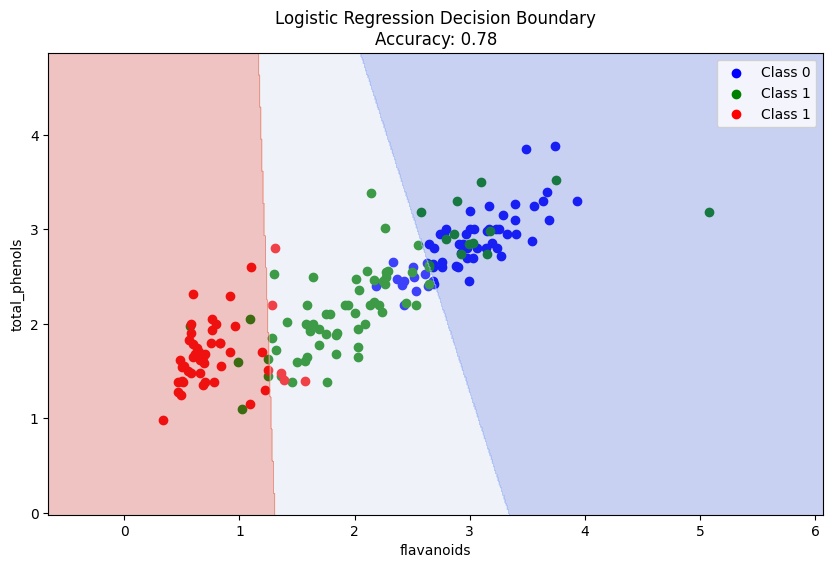

In [ ]:
# Visualize the decision boundary
plt.figure(figsize=(10, 6))

# Plot points from class 0 (Target = 0)
plt.scatter(df['flavanoids'][df['class'] == 1], df['total_phenols'][df['class'] == 1], color='blue', label='Class 0')

# Plot points from class 1 (Target = 1)
plt.scatter(df['flavanoids'][df['class'] == 2], df['total_phenols'][df['class'] == 2], color='green', label='Class 1')

# Plot points from class 1 (Target = 1)
plt.scatter(df['flavanoids'][df['class'] == 3], df['total_phenols'][df['class'] == 3], color='red', label='Class 1')

# Plot the decision boundary
x_min, x_max = df['flavanoids'].min() - 1, df['flavanoids'].max() + 1
y_min, y_max = df['total_phenols'].min() - 1, df['total_phenols'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

plt.xlabel('flavanoids')
plt.ylabel('total_phenols')
plt.title(f'Logistic Regression Decision Boundary\nAccuracy: {accuracy:.2f}')
plt.legend()
plt.show()

### **Results/Findings**

**Logistic Regression 1:**

This model was trained using all remaining columns as independent variables against the dependent target column. The model produced an accuracy score of 0.97 which inidcates that the model predicted the target class for aproximately 97% of the test data. Both the precision and recall scores are extremely high, if not 100% as well. This would suggest the model is very accurate at predicting the target column with the given data. The model was most accurate at predicting the classificaiton '3'. However this was the least supported class, with the data only representing almost half the value of the other 2 classifications. Perhaps, if there was a more even spread of the data that lead to equal support scores amongst all classificaitons, the model was have performed more evenly.

**Logistic Regression 2:**

This model was trained using 2 of the column with the highest corelation coefficient values relating to the target column, against the dependent variable 'class' column. The accuracy score was 0.78 which indicates that the model predicted the correct values 78% of the time, this is still a fairly good performance however compared our first logistic regression, there is a much higher rate of inconsistency. The scatter plot with the discision boundary also confirms this, with the vast majority of the plots residing in the correct classifications, however, there are a few outliers (particularly in class 2) which have clearly skewed the results/accuracy of the model. This proves that there are more columns that are significant to predicitng the target column.


#**Comparison, Analysis & Conclusions**

To summarize, all of our linear and logistic regression analysis' turned out succesful in one way or another at finding a strong relaation between the chosen columns and the target. However there were inconsistencies between the 4 models:

Simple Linear Regresison:

*   This analysis was between the two columns 'flavanoids' and 'total_phenols' and aimed to find a positive linear relationship between data, then using the finidings to plot a line of regression that could approximately predict the data at any given point on the graph. Overall this proved to be mostly successful with an R-value of 0.87; indicating a strong positive relationship, and a LR score of 0.76; suggesting that the majority of the variability in the target can be explained by the linear relationship with the dependent variable, however there is still some uncertainty with these scores.

Complex Linear Regression:

*    This analysis was between 3 dependent columns (flavanoids, total_phenols, 0D280_0D315_of_diluted_wines) against the dependent column 'class' in an attempt to try and predict the target columns using the 3 most strongly relating columns to the target. This analysis turned out successful, the model managed to predict the class category more often that not with an Mean Absolute Error of 0.421098641938450 - this is an average of the absolute differences between the results and the test data, overall its not bad but with 3 categorical outcomes between 1-3, this definetely could be improved on. The Mean Square Error returned a result of 0.3231312944573045. This would suggest that the model is actuall more accurate than what the MSE results tell us, and that there is perhaps fewer, but larger errors in the results that are weighing the results down. It's also worth noting that if the results were rounded to the nearest whole number -which is likely in a real world scenario- then the model would probably reflect more accurate results.

Logistic Regresison 1:

*   This analysis was between all columns (minus the class) as the independent variable, against the dependent variable 'class' as the tearget. The aim of this analysis was to use the entire dataset to train the regression model and attempt to predict the target value against the test data. The model proved to be the most successful of the 4. Boasting a 0.97 accuracy score, meaning that it predicted the test data values 97% of the time. The model also performed well across all other classifications, with high precision, recall, and F1-Score. The high values in all these metrics indicate a robust performance of the model on the test data and has proven to be a great tool to preidct the class of the wine.


Logistic Regression 2:

*   This analysis was between the 2 highest relating columns to the class (flavanoids and total_phenols) as the independent variables against the dependent vriable (class) to try and predict the target outcome. This analysis was relatively successful with an accuracy score of 0.78 but nowehre near as consistent as our previous logistic regresison. This inidcates to me that there are more columns than just the the high R-Valued ones that are significant in painting a picture about the wine. In this instance, more columns definetely lead to a higher accuracy in the predictions against the test data, perhaps if I had added another specific column or two the results would have been on parr with our previous analysis, but the main finding from this analysis is that there are more contributing factors to predicting the target value than i previously thought.


Both Linear and logistic regressions are relavent machine learning when applied to this data set.

Linear regression analysis aims to predict a continuous target variable when a linear relationship is present between two columns. This is perfect for the wine dataset as there are already liearn relationsips present in the data, which can now be used to deterimine a target variable for future wines.

Logistic regression aims to predict the probability that an instance belongs to a particular class. This is most useful for our wine data set as the outcome (target) is a classification of the wine from 1-3. This allowed us to train two multinominal regression models that aim to predict the classificaiton of the wine. A model (particularly the 1st logistic regression model) could be implemented to automate the classification proccess, as it has already proven to be 97% accurate with little training. future scalling is definetely a concern; the model should be trained more with bigger and more robust datasets before being realied on to accruately predict the class 100% of the time, but as for now, the model shows a lot of promise.

due to the nature of this data set, I think that a logistic analsysis lends itself to be far more useful in this scenario. The linear regression certianly proved to be useful, and could predict the class column with relative accuracy. However, the results have proven that a logistic regression model is far superior in the context of predicting the class. This is because the target column is categorical, which is more suited to logistic regressiona analysis. The 97% success rate of the model outweighs the 0.42 Mean absolute error of the Linear model. This makes sense since we are trying to predict a set a of categorical data types, something best suited to logistc regression models. Linear regression analysis worked best on continuous nominal values. That being said, our best working model relied on all cloumns of data in order to produce such a high success rate at predicting the target. It is worth noting that our 2nd logistic analysis, while produced a lower score, only required 2 columns to train. This would suggest that the total_phenols and flavanoids are far more significant that other columns when isloated at predicting the class of the wine. The model would perhaps benifit from one more column being added into the mix; 0D280_0D315_of_diluted_wines also scored relatively high In R-value in relation to the class. So perhaps if we added this column into the independent values and then trained the model, we would produce much higher results.

**In conlclusion...**

the columns which can help to best predict the class columns are as follows:

* flavanoids
* total_phenols
* 0D280_0D315_of_diluted_wines

However, these 3 columns alone cannot realiably predict the target 'class' through linear/logistic regression 100% of the time. Other, less relative columns are also required to paint a better picture as to what are the contributing facotrs that lead to 1/2/3 classificaiton of the target.

Logistic regression models seemed to be more fitting in the context of predciting the target class due to the categorical nature of the data and proved to be more accurate as the amount of columns the model was trained on increased.  

Through the use of a decision boundary visualisation, it is clear that the classification with the most volatilty and outliers was '2'. The model seemed to be much more accurate at creating a boundary for classes '1' and '3'. this is most likely due to the tighter clustering on the graph where as the plots for '2' are much more volatile.

Linear regression models proved to be less accurate, however, still showed a significance in predticting the class outcome more so than not. If the results were rounded to the nearest whole number like in a real world scenario then this accuracy would have increased. Linear regression models also proved to be very useful at understanding the realtionships between columns outwith the target column. Which -through further analysis- could also lead to a better understanding of the data and help predict the target.

